In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [38]:
training_set=pd.read_csv('training_set.csv')
test_set=pd.read_csv('test_set.csv')
submission=pd.read_csv('sample_submission.csv')
training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
training_set.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [40]:
df=training_set.groupby('label').size()
df

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

([<matplotlib.patches.Wedge at 0x7f1b70150f10>,
 [Text(1.009715941908538, 0.648439447177417, '0'),
  Text(0.4007374530752824, 1.1311098504136263, '1'),
  Text(-0.38011292572475985, 1.1382065558135586, '2'),
  Text(-0.9831711880125127, 0.6880221036144585, '3'),
  Text(-1.1997730739283365, -0.023336046720701168, '4'),
  Text(-0.9850203532861802, -0.6853720913576572, '5'),
  Text(-0.43347529014466857, -1.1189723735794355, '6'),
  Text(0.3189845490579556, -1.1568270646307912, '7'),
  Text(0.9416017563349527, -0.7438992757537357, '8'),
  Text(1.1984113249685857, -0.06172759664071627, '9')],
 [Text(0.5890009661133138, 0.3782563441868266, '9.8%'),
  Text(0.2337635142939147, 0.6598140794079486, '11.2%'),
  Text(-0.2217325400061099, 0.6639538242245757, '9.9%'),
  Text(-0.5735165263406323, 0.40134622710843404, '10.4%'),
  Text(-0.6998676264581962, -0.013612693920409015, '9.7%'),
  Text(-0.574595206083605, -0.39980038662530004, '9.0%'),
  Text(-0.2528605859177233, -0.652733884588004, '9.8%'),
  T

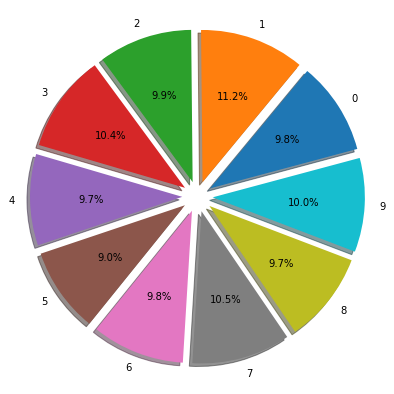

In [41]:
label='0','1','2','3','4','5','6','7','8','9'
my_explode=(0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,)
plt.figure(figsize=(7,7))
plt.pie(df,labels=label, autopct='%1.1f%%',startangle=15, shadow=True ,explode=my_explode)

<BarContainer object of 10 artists>

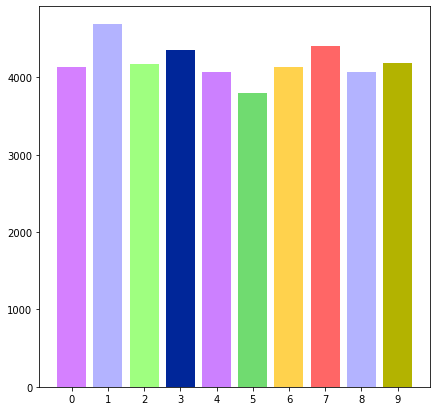

In [42]:
plt.figure(figsize=(7,7))
colors=['#d580ff','#b3b3ff','#9fff80','#002699','#cc80ff','#70db70','#ffd24d','#ff6666','#b3b3ff','#b3b300']
plt.bar(label,df,color=colors)

In [43]:
y=training_set['label']

In [44]:
from keras.utils.np_utils import to_categorical 
y= to_categorical(y)

In [45]:
x=training_set.drop(labels='label',axis=1)

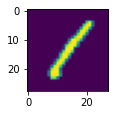

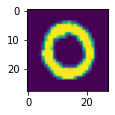

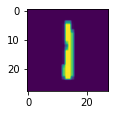

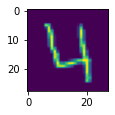

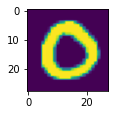

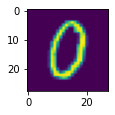

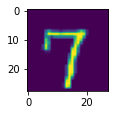

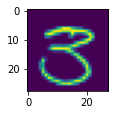

In [46]:
for i in range(0,8):
    digit1=(x.iloc[i:i+1,:].to_numpy()).reshape(28,28,1)
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(digit1)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [48]:
x_train.shape

(33600, 784)

In [49]:
x_train=x_train.values.reshape(len(x_train),28,28,1)

In [50]:
x_test=x_test.values.reshape(len(x_test),28,28,1)

In [51]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [52]:
y_test.shape

(8400, 10)

In [53]:
y_train.shape

(33600, 10)

In [54]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [55]:
import tensorflow as tf

In [56]:
cnn=tf.keras.models.Sequential()

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4), activation='relu', input_shape=(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=10 ,activation='softmax'))
cnn.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])


In [58]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy',factor=0.2,patience=5,min_lr=0.001)

In [59]:
history=cnn.fit(x_train, y_train, validation_data=(x_test ,y_test), epochs=32, callbacks=[reduce_lr])

Epoch 1/32
1050/1050 [==============================] - 15s 14ms/step - loss: 0.5861 - accuracy: 0.9013 - val_loss: 0.1658 - val_accuracy: 0.9521
Epoch 2/32
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0986 - accuracy: 0.9700 - val_loss: 0.1093 - val_accuracy: 0.9713
Epoch 3/32
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.1290 - val_accuracy: 0.9658
Epoch 4/32
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 5/32
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.0863 - val_accuracy: 0.9769
Epoch 6/32
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.1356 - val_accuracy: 0.9738
Epoch 7/32
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0504 - accuracy: 0.9863 - val_loss: 0.0992 -

In [60]:
y_pred = cnn.predict(x_test)

In [61]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)


In [62]:
y_pred

array([3, 6, 9, ..., 2, 7, 2])

In [63]:
y_test

array([3, 6, 9, ..., 2, 7, 2])

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cn=confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[[808   0   2   0   1   0   2   0   0   0]
 [  0 949   6   2   1   0   0   1   1   1]
 [  2   1 853   0   0   0   0   2   2   0]
 [  0   0   4 853   1   1   0   1   0   3]
 [  1   2   0   0 808   0   3   0   0  13]
 [  1   0   0   4   0 743   2   0   3   3]
 [  3   1   1   0   2   2 831   0   1   0]
 [  2   2  17   3   7   1   0 857   1   9]
 [  1   0   3   1   0   0   2   0 757   4]
 [  3   0   1   2   1   1   0   0   5 799]]


0.9830952380952381

In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


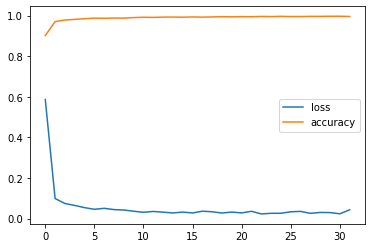

In [66]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [67]:
test_set=test_set.values.reshape(-1,28,28,1)

In [68]:
Y_prediction=cnn.predict(test_set)

In [69]:
Y_prediction=np.argmax(Y_prediction, axis=1)

In [70]:
Y_prediction

array([2, 0, 9, ..., 3, 9, 2])

In [71]:
submission['Label'] = Y_prediction
submission.to_csv("my_submission.csv", index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
